In [70]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import numpy as np
import re

- Зібрати дані опитування

In [71]:
# зібрати всі дані в df
df_bus_stantion = pd.read_csv("./data/Bus Stantion + Park_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #bus stanion
df_central_square = pd.read_csv("./data/Central square_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #central square
df_linkedin = pd.read_csv("./data/Lkdn_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #linkedin
df_social_media = pd.read_csv("./data/Володимир Медіа_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #internet
df_kogorta = pd.read_csv("./data/Когорта_ Майбутнє туризму у Володимирі_ думка мешканців та гостей міста .csv") #individual groups

In [94]:
len(df_bus_stantion)+len(df_central_square)+len(df_kogorta)

66

- Функція упорядкування даних

In [72]:
def add_origin_column(df, column_name):
    df["origin"] = column_name
    df = df.rename(
        columns={
            "Стать респондента": "sex", 
            "Рік народження": "age",
            "Скільки часу ви проживаєте у місті Володимир": "years_lived",
            "Ваш рід занять": "occupation",
            "Рівень доходу": "sallary",
            "Яку частину доходу ви витрачаєте на діяльсть пов'язану з туризмом та сферою обслуговування ": "Income_spent_on_tourism",
            "Як ви ставитесь до візитів хасидів до Володимира?": "hasidic_loyalty",
            "Як ви ставитесь до туристів з Польщі?": "polish_loyalty",
            "Як ви ставитесь до туристів з інших країн?":"other_loyalty",
            "На вашу думку який у вас рівень володіння англійською мовою?":"english_level",
            "На вашу думку який у вас рівень володіння польською мовою?":"polish_level",
            "Чи достатньо, на вашу думку, у Володимирі готелей, для розміщення туристів чи туристичних груп?":"holels_sits",
            "Чи достатньо, на вашу думку, у Володимирі закладів харчування?":"caffee_sits",
            "Чи вважаєте ви, що Володимир достатньо представлений в інтернеті як туристичне місто?":"internet_representation",
            " Які туристичні об’єкти у Володимирі є, на вашу думку, ключовими для приваблення туристів?":"key_items",
            "Які зміни в туристичній інфраструктурі ви вважаєте найбільш необхідними? (можна кілька варіантів)":"key_changes",
            "Які об’єкти, на вашу думку, слід відкрити чи розвинути у Володимирі, щоб туристи залишалися довше? (можна кілька варіантів)":"tourism_development",    
            "Як ви ставитесь до візитів хасидів до Володимира?\n\nцього читати респондентам не потрібно (Карлін-столінські хасиди, вшановують пам’ять свого цадика (духовного провідника) Шломо Готліба Карлінера, який помер у 1792 році і похований на колишньому єврейському цвинтарі, нині це паркова зона в районі вулиці Драгоманова)  " : "hasidic_loyalty2"       
            })
    return df

- додати необхідні колонки

In [73]:
# прогнати дані через функцію нормалізації
df_bus_stantion = add_origin_column(df_bus_stantion, "bus stantion")
df_central_square = add_origin_column(df_central_square, "central_square")
df_linkedin = add_origin_column(df_linkedin, "linkedin")
df_social_media = add_origin_column(df_social_media, "social media")
df_kogorta = add_origin_column(df_kogorta, "test group")

# одбєднати дані в спільний dataframe
df_union =  pd.concat([df_bus_stantion, df_central_square, df_linkedin, df_social_media, df_kogorta], axis=0, ignore_index=True)
df_union["_hasidic_loyalty"] = df_union["hasidic_loyalty"].fillna(df_union["hasidic_loyalty2"])

#обробка поодиноких випадків помилкового внесення даних року народження
df_union['age'] = df_union['age'].replace("09.07.89", 1989)
df_union['age'] = df_union['age'].replace("05.08.1993", 1993)

#перетворити категорійний час проживання у місті на числовий 
living4_dict = {
    "10-20 років": 15,
    "2-5 років": 3.5,
    "до 5 років": 2.5,
    'менше 2 років': 1, 
    '5-10 років': 7.5,
    'більше 20 років': 20
}
#перетворити категорійну заробітню плату на числовий аналог
sallary_dict = {
    'до 10 000 грн':5000,
    '10 000 грн - 20 000 грн':15000, 
    '20 000 грн - 40 000 грн':30000, 
    '40 000 грн - 60 000 грн':50000,
    '60 000 грн - 100 000 грн':80000, 
    '> 100 000 грн':100000
}
#перетворити категорійний відсоток витрат на числовий аналог
spent_on_tourism_dict = {
    r'до 5%':2.5,
    r'5%-10%':5,
    r'10%-20%':15,
    r'>20%':25
}

df_union["_years_lived"] = df_union["years_lived"].replace(living4_dict) #визначити час проживання респондента
df_union["_sallary"] = df_union["sallary"].replace(sallary_dict) #визначити зп респондента
df_union["_income_spent_on_tourism"] = df_union["Income_spent_on_tourism"].replace(spent_on_tourism_dict) #визначити зп респондента

df_union['_age'] = 2025 - pd.to_numeric(df_union['age'], errors='coerce') #визначити вік респондента
df_union["Income_spent_on_tourism"].unique()


C:\Users\ПК\AppData\Local\Temp\ipykernel_9872\4113483733.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_union["_years_lived"] = df_union["years_lived"].replace(living4_dict) #визначити час проживання респондента
C:\Users\ПК\AppData\Local\Temp\ipykernel_9872\4113483733.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_union["_sallary"] = df_union["sallary"].replace(sallary_dict) #визначити зп респондента
C:\Users\ПК\AppData\Local\Temp\ipykernel_9872\4113483733.py:44: FutureWarning: Downcasting behavior in `replace` i

array(['10%-20%', 'до 5%', '>20%', nan, '5%-10%'], dtype=object)

- розбити на таблицю key changes, щоб перевести в буль

In [74]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['key_changes']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_key_changes_' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)

- розбити на таблицю key changes, щоб перевести в буль

In [75]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['key_items']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_key_items' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)

- розбити на таблицю key changes, щоб перевести в буль

In [76]:
# базова нормалізація: заміна різних апострофів і обрізання пробілів по краях
clean = (df_union['tourism_development']
         .fillna('')
         .str.replace(r"[`ʼ’']", "’", regex=True))

# get_dummies сам розіб'є за ; і зробить 0/1-колонки
dummies = (clean.str.get_dummies(sep=';')
                .rename(columns=lambda c: c.strip()))  # обрізати пробіли у назв

# (необов'язково) префікс для зручності
dummies = dummies.rename(columns=lambda c: '_tourism_development' + c)

# приєднати до датафрейму
df_union = pd.concat([df_union, dummies], axis=1)
print(df_union["occupation"].value_counts())

occupation
Працівник                95
Приватний підприємець    22
Пенсіонер                20
Тимчасово не працюю      15
Учень                     8
Військовослужбовець       8
Студент                   4
Name: count, dtype: int64


In [77]:
# Сформувати датафрейм для обробки
df_total = df_union.drop(df_union[["age", "years_lived", "sallary", "Income_spent_on_tourism","hasidic_loyalty2", "hasidic_loyalty","key_items", "key_changes", "tourism_development"]], axis=1)
df_total['spends_to_tourism'] = df_total['_sallary']*df_total['_income_spent_on_tourism']/100
df_total.to_excel("test_output.xlsx")

In [78]:
# Функція формування кругової діаграми
def radical(series, show_nan=True, nan_label="Не вказано", title=None, ax=None, set_colors=None, angle=90):
    s = series.copy()

    if show_nan:
        s = s.fillna(nan_label)
        counts = s.value_counts(dropna=False)
    else:
        counts = s.dropna().value_counts()

    total = counts.sum()
    if total == 0:
        print("Немає даних для відображення.")
        return None

    labels = [f'{k}, {round(v/total*100,1)}%' for k, v in counts.items()]

    if not set_colors:
        cmap = plt.cm.Blues
        colors = cmap(np.linspace(0.35, 0.9, len(counts)))
    else:
        cmap = plt.get_cmap('tab20', len(counts))   # або 'Set3', 'tab20b', 'tab20c'
        colors = cmap(range(len(counts)))


    if ax is None:
        ax = plt.gca()

    counts.plot(
        kind='pie',
        labels=labels,
        autopct=None,
        ylabel='',
        startangle=angle,
        labeldistance=1.1,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        textprops={"fontsize": 10},
        ax=ax
    )

    if title is None:
        title = f"Розподіл: {getattr(series, 'name', '')}".strip(": ")
    ax.set_title(title)

    return ax

### Розподіл по статті

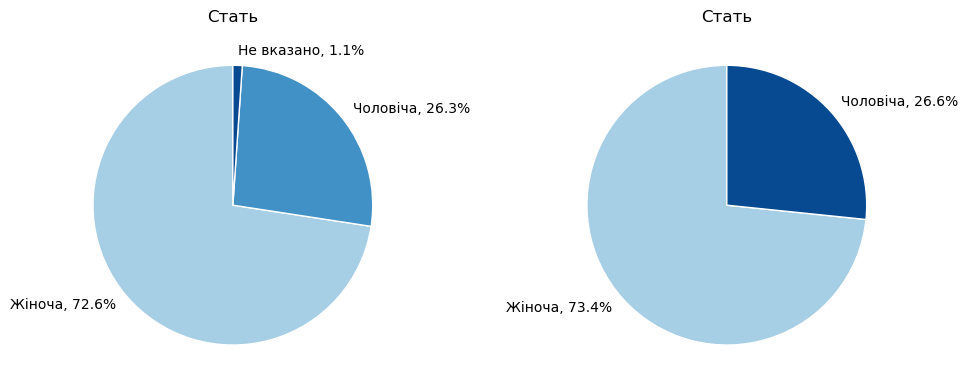

In [79]:
# Сформувати розподіл по гендеру

# radical(df_total['sex'], False,...,"Розподіл по статті")
# radical(df_total['sex'], True,"Не вказано","Розподіл по статті")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

radical(df_union['sex'], show_nan=True,  nan_label="Не вказано", title="Стать", ax=axes[0])
radical(df_union['sex'], show_nan=False, title="Стать", ax=axes[1])

plt.tight_layout()
plt.show()

### Лояльність до хасидів

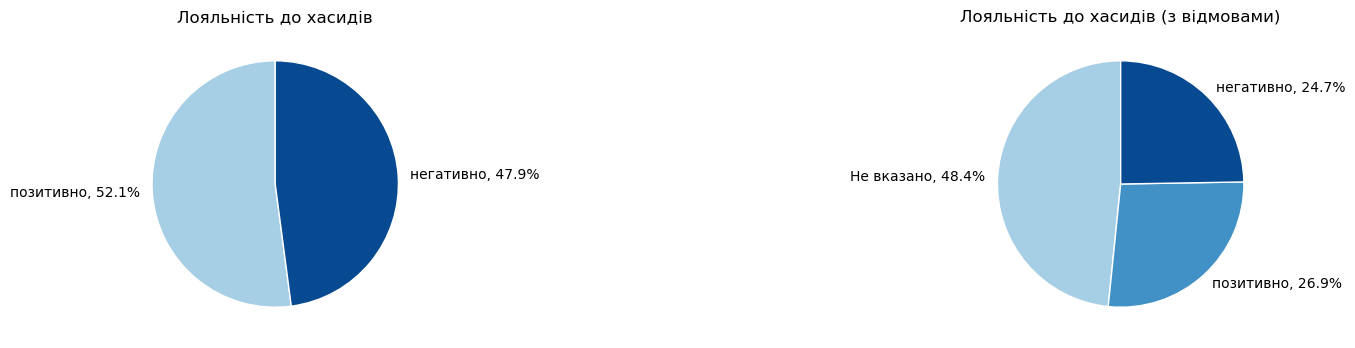

In [80]:
hasidic_loyalty = df_total['_hasidic_loyalty']

hsd_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

hasidic_loyalty =hasidic_loyalty.replace(hsd_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

radical(hasidic_loyalty, show_nan=False, title="Лояльність до хасидів", ax=axes[0])
radical(hasidic_loyalty, show_nan=True, title="Лояльність до хасидів (з відмовами)", ax=axes[1])
plt.show()


### Лояльність до польських туристів

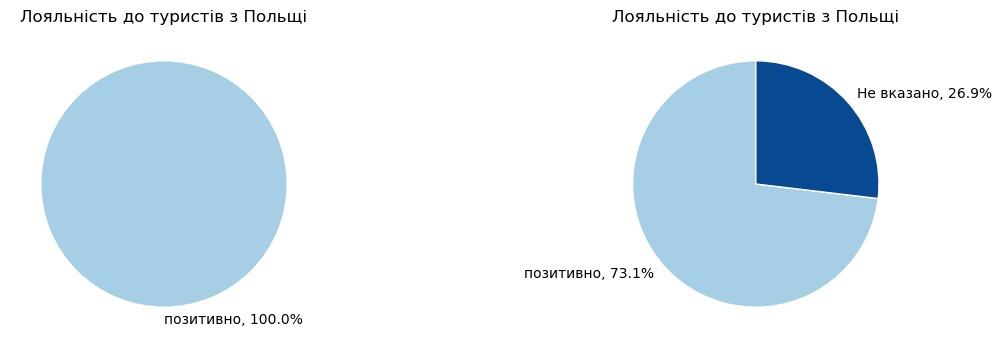

In [81]:
polish_loyalty = df_total['polish_loyalty']

hsd_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

polish_loyalty =polish_loyalty.replace(hsd_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(polish_loyalty, show_nan=False, title="Лояльність до туристів з Польщі", ax=axes[0])
radical(polish_loyalty, show_nan=True, title="Лояльність до туристів з Польщі", ax=axes[1])
plt.show()

### Лояльність до туристів з інших країн

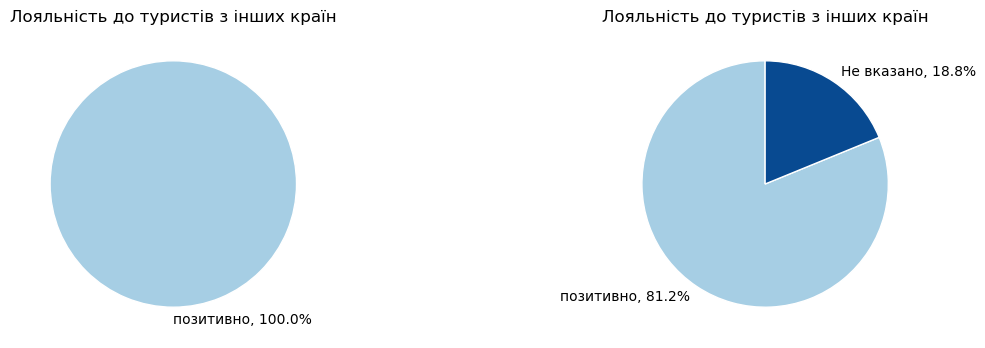

In [82]:
other_loyalty = df_total['other_loyalty']

oth_llt_dict = {
    'Позитивно, туристи це завжди добре для міста':'позитивно',
    'Негативно, вони залишають багато сміття і вони люди іншої культури, яка для нас чужа':'негативно',
    'На мене це ніяк не впливає': None
}

other_loyalty = other_loyalty.replace(oth_llt_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(other_loyalty, show_nan=False, title="Лояльність до туристів з інших країн", ax=axes[0])
radical(other_loyalty, show_nan=True, title="Лояльність до туристів з інших країн", ax=axes[1])
plt.show()

### Рівень володіння англійською

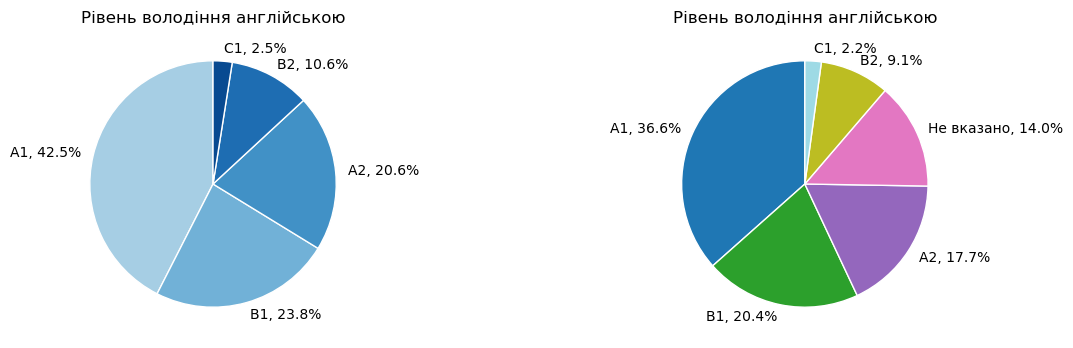

In [83]:
eng_level = df_total['english_level']

eng_level_dict = {
    'початковий (A1)':'A1',
    'елементарний (A2)':'A2',
    'середній (B1)': 'B1', 
    'вище середнього (B2)':'B2', 
    'просунутий (C1)': "C1"
}

eng_level = eng_level.replace(eng_level_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(eng_level, show_nan=False, title="Рівень володіння англійською", ax=axes[0])
radical(eng_level, show_nan=True, title="Рівень володіння англійською", ax=axes[1], set_colors=True)

plt.show()

### Рівень володіння польською

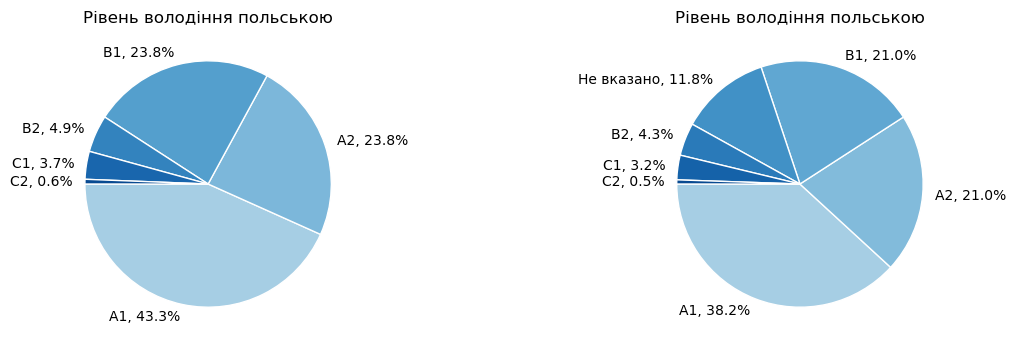

In [84]:
eng_level = df_total['polish_level']

eng_level_dict = {
    'початковий (A1)':'A1',
    'елементарний (A2)':'A2',
    'середній (B1)': 'B1', 
    'вище середнього (B2)':'B2', 
    'просунутий (C1)': "C1",
    'досконалий (C2)': "C2"
}

eng_level = eng_level.replace(eng_level_dict)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

radical(eng_level, show_nan=False, title="Рівень володіння польською", ax=axes[0], angle=180)
radical(eng_level, show_nan=True, title="Рівень володіння польською", ax=axes[1], angle=180)

plt.show()


### Достатність місць в готелях

<Axes: title={'center': 'Достатність місць в готелях'}>

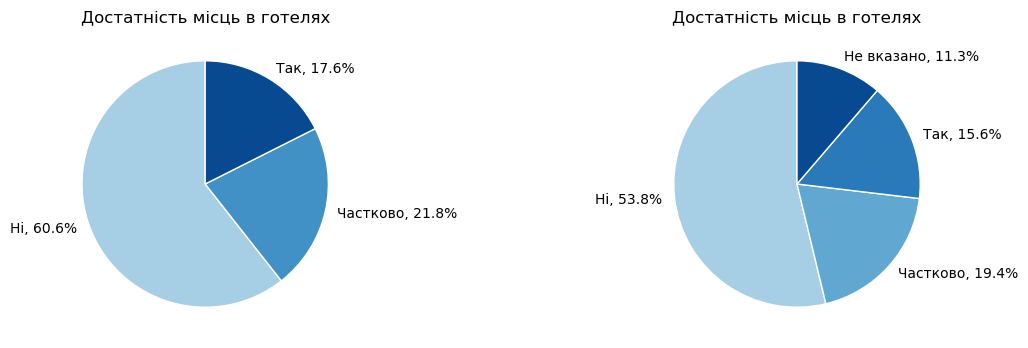

In [85]:
# Достатність місць в готелі
hotel_sits = df_total["holels_sits"] 

fig, axes = plt.subplots(1,2, figsize=(14,4))

radical(hotel_sits, show_nan=False, title="Достатність місць в готелях", ax=axes[0])
radical(hotel_sits, show_nan=True, title="Достатність місць в готелях", ax=axes[1])

### Забезпеченість місцями в закладах громадського харчування

<Axes: title={'center': 'Достатність місць в кафе та ресторанах'}>

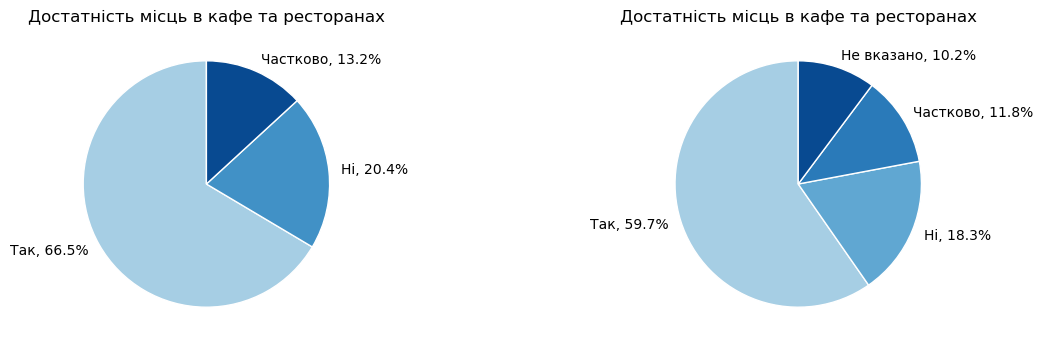

In [86]:
# Достатність місць в готелі
caffee_sits = df_total["caffee_sits"] 

fig, axes = plt.subplots(1,2, figsize=(14,4))

radical(caffee_sits, show_nan=False, title="Достатність місць в кафе та ресторанах", ax=axes[0])
radical(caffee_sits, show_nan=True, title="Достатність місць в кафе та ресторанах", ax=axes[1])

### Представленість міста в інтернеті

<Axes: title={'center': 'Представленість міста в інтернеті'}>

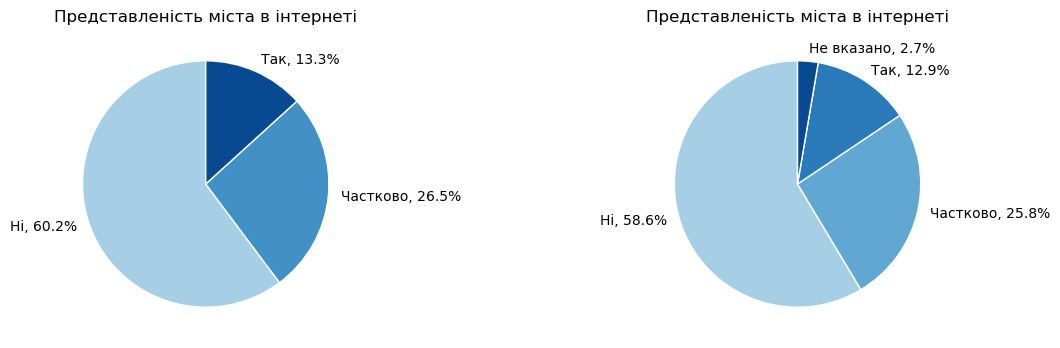

In [87]:
df_total['internet_representation'].unique()
internet_rep = df_total['internet_representation']

fig, axes = plt.subplots(1,2, figsize=(14,4))
radical(internet_rep, show_nan=False, title="Представленість міста в інтернеті", ax=axes[0])
radical(internet_rep, show_nan=True, title="Представленість міста в інтернеті", ax=axes[1])


In [88]:
# print(df_total.columns)
mean_age = df_total['_age'].mean()
spends = df_total["spends_to_tourism"].mean()
population_of_city = 1
population_above_18 = 3640+3229+8495+7534+3439+3049
population_under_18 = 1011+897+2428+2152+1214+1076
print(population_above_18+population_under_18)
tour_costs_2023 = 255172
tour_costs_2024 = 215647
tour_costs_2024_1_half = 106714
tour_costs_2025_1_half = 146823
tour_costs_2021 = 75390
tour_costs_2025 = tour_costs_2024/tour_costs_2024_1_half*tour_costs_2025_1_half

# turzbir_dynamic = [tour_costs_2023, tour_costs_2024, tour_costs_2025]
turzbir_dynamic = pd.DataFrame({
    "year": [2023, 2024, 2025],
    "tour_costs": [tour_costs_2023, tour_costs_2024, tour_costs_2025]
})

print(f"Середній вік респондентів = {mean_age}")
print(f"Середні витрати на туризм = {round(spends,2)} грн")
print(f"Загальна сума коштів, яку жителі міста готові витрачати на туристичну галузь (включно з кафе та ресторанами) за рік на все населення старше 18 років {population_above_18*round(spends,2)*12}")
print(f"Турзбір 2025 - {round(tour_costs_2025, 0)}")
print(turzbir_dynamic)

38164
Середній вік респондентів = 52.16326530612245
Середні витрати на туризм = 1465.52 грн
Загальна сума коштів, яку жителі міста готові витрачати на туристичну галузь (включно з кафе та ресторанами) за рік на все населення старше 18 років 516789248.64
Турзбір 2025 - 296699.0
   year     tour_costs
0  2023  255172.000000
1  2024  215647.000000
2  2025  296699.022443


In [89]:
def Bar(series, title="Title", strip_prefix="_key_changes_", decimals=1):
    # 1) Приводимо до Series і чистимо
    s = pd.Series(series).dropna()
    if strip_prefix:
        s.index = s.index.str.replace(rf"^{strip_prefix}", "", regex=True)

    # 2) Сортуємо для читабельності
    s = s.sort_values(ascending=True)

    # 3) У відсотки
    total = s.sum()
    if total == 0:
        print("Немає даних для відображення.")
        return
    perc = s / total * 100

    # 4) Графік
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(perc.index, perc.values)   # без явних кольорів

    ax.set_xlabel("Частка, %")
    ax.set_ylabel("Пропозиції змін")
    ax.set_title(title)

    # Трохи запасу праворуч
    max_val = perc.max()
    ax.set_xlim(0, max_val * 1.15)

    # 5) Підписи на стовпчиках
    for patch, val in zip(bars, perc.values):
        x = patch.get_width()
        y = patch.get_y() + patch.get_height() / 2
        ax.text(x + max_val * 0.02, y, f"{val:.{decimals}f}%", va="center")

    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

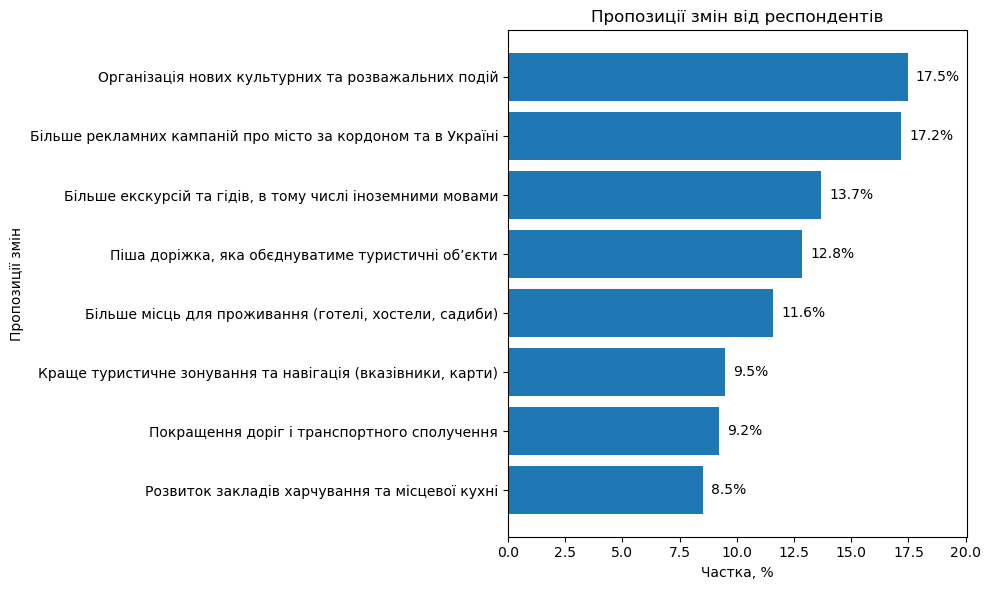

In [90]:
df_key = df_total.loc[:, df_total.columns.str.contains(r"_key_changes_")]
s = pd.Series(df_key.sum())
s.index = s.index.str.replace(r"^_key_changes_", "", regex=True)
s = s.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
Bar(s, "Пропозиції змін від респондентів")

<Figure size 1000x600 with 0 Axes>

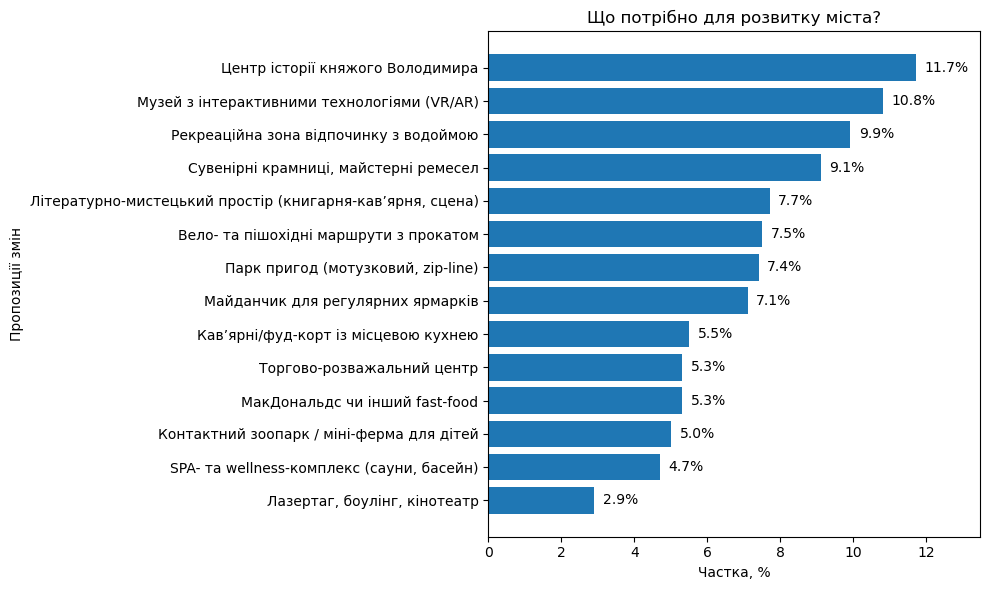

In [91]:
df_key = df_total.loc[:, df_total.columns.str.contains(r"_tourism_development")]
s = pd.Series(df_key.sum())
s.index = s.index.str.replace(r"^_tourism_development", "", regex=True)
s = s.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
Bar(s, "Що потрібно для розвитку міста?")

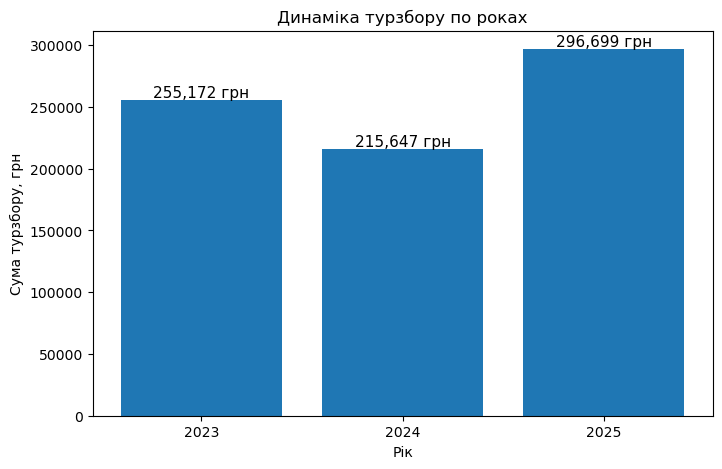

In [92]:
plt.figure(figsize=(8, 5))
bars = plt.bar(turzbir_dynamic["year"], turzbir_dynamic["tour_costs"], width=0.8, align='center')
plt.xticks(turzbir_dynamic["year"])
plt.title("Динаміка турзбору по роках")
plt.xlabel("Рік")
plt.ylabel("Сума турзбору, грн")

# Додаємо підписи на стовпчиках
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,} грн', ha='center', va='bottom', fontsize=11)

plt.show()
# Bar(turzbir_dynamic, "Що потрібно для розвитку міста?")

#--------------